<a href="https://colab.research.google.com/github/hodzicc/ColabNotebooks-AI/blob/main/LV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Učitati The Boston Housing Price skup podataka. Skup podataka je dio Keras biblioteke te se može učitati
sljedećim kodom:


In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


Koji je oblik podataka za treniranje, a koji za testiranje? Koliko ima ukupno atributa (značajki)?

In [ ]:
print("Oblik podataka za treniranje:", train_data.shape)
print("Oblik podataka za testiranje:", test_data.shape)
print("Ukupno atributa (značajki):", train_data.shape[1])

Oblik podataka za treniranje: (404, 13)
Oblik podataka za testiranje: (102, 13)
Ukupno atributa (značajki): 13


Koji je opseg vrijednosti (min i max ) za svaki atribut u skupu podataka? A koji je opseg vrijednosti za ciljne
(eng. target) vrijednosti?

In [ ]:
min_vrijednost = train_data.min(axis=0)
max_vrijednost = train_data.max(axis=0)
min_ciljana_vrijednost = train_targets.min()
max_ciljana_vrijednost = train_targets.max()

for i in range(train_data.shape[1]):
  print(f"Atribut {i+1}: [{min_vrijednost[i]:.2f}, {max_vrijednost[i]:.2f}]")

print(f"Opseg vrijednosti za ciljne vrijednosti: [{min_ciljana_vrijednost}, {max_ciljana_vrijednost}]")

Atribut 1: [0.01, 88.98]
Atribut 2: [0.00, 100.00]
Atribut 3: [0.46, 27.74]
Atribut 4: [0.00, 1.00]
Atribut 5: [0.39, 0.87]
Atribut 6: [3.56, 8.72]
Atribut 7: [2.90, 100.00]
Atribut 8: [1.13, 10.71]
Atribut 9: [1.00, 24.00]
Atribut 10: [188.00, 711.00]
Atribut 11: [12.60, 22.00]
Atribut 12: [0.32, 396.90]
Atribut 13: [1.73, 37.97]
Opseg vrijednosti za ciljne vrijednosti: [5.0, 50.0]


S obzirom da podaci zauzimaju široke spektre vrijednosti, izvršiti skaliranje korištenjem MinMaxScaler-a.
Obavezno povesti računa da se parametri scaler-a za skaliranje izračunaju nad trening skupom podataka, a
da se skaliranje izvrši i nad trening i nad test skupom;

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data)
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

Napisati pomoćnu funkciju def model_mreze() koja će vraćati model mreže (return model) opisan u
nastavku. Model treba da ima 2 skrivena Dense sloja sa po 64 neurona sa relu aktivacijskim funkcijama.
Dimenzije ulaznog sloja odrediti na osnovu broja atributa skupa podataka. Treći, koji je i posljednji sloj, treba
imati samo jedan neuron i ne treba imati aktivacijsku funkciju;

In [ ]:
from keras import models
from keras import layers

def model_mreze():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    return model

Kompajlirati model da koristi mse funkciju gubitka, adam optimizator i mae metriku. S obzirom da su ciljne
vijednosti izražene u hiljadama dolara, metrika MAE govori koliko model griješi u hiljadama dolara. Na primjer,
ukoliko je vrijednost MAE = 4.2, to znači da predviđanja modela odstupaju u prosjeku za $4200;

In [ ]:
model = model_mreze()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Izvršiti treniranje modela na 100 epoha, sa veličinom batch-a jednakoj 1. Koristiti 10% trening skupa za
validaciju. Kolika je postignuta vrijednost funkcije gubitka na kraju treniranja, a kolika je vrijednost metrike
MAE? Grafički prikazati;

Vrijednost funkcije gubitka na kraju treniranja: 10.24406909942627
Vrijednost metrike MAE na kraju treniranja: 2.188253402709961


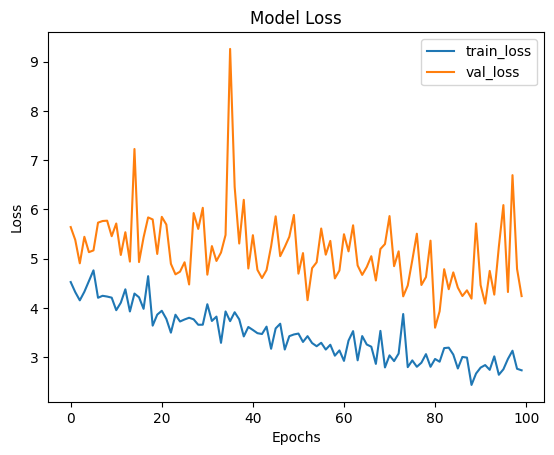

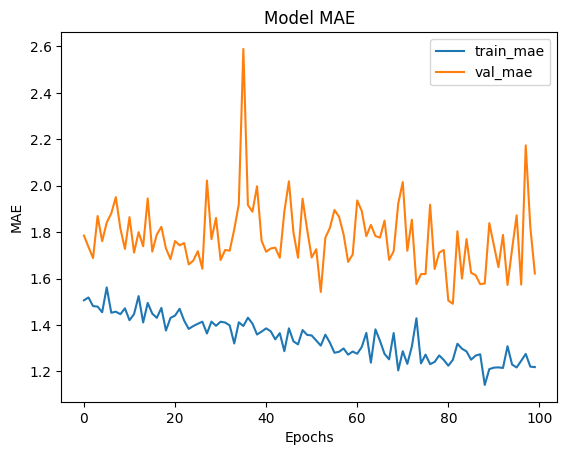

In [ ]:
history = model.fit(train_data_scaled, train_targets, epochs=100, batch_size=1, validation_split=0.1, verbose=0)

# Vizualizacija funkcije gubitka i MAE
import matplotlib.pyplot as plt

loss = model.evaluate(test_data_scaled, test_targets, verbose=0)[0]
mae = model.evaluate(test_data_scaled, test_targets, verbose=0)[1]
print("Vrijednost funkcije gubitka na kraju treniranja:", loss)
print("Vrijednost metrike MAE na kraju treniranja:", mae)

# Prikazivanje grafa funkcije gubitka tijekom treniranja
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prikazivanje grafa MAE tijekom treniranja
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

U prethodnom grafičkom prikazu problem predstavlja skala i visoka varijansa nad validacijskim skupom po-
dataka. Iz tog razloga je korisno prikazati usrednjene vrijednosti i zanemariti prvih 10 uzoraka radi visoke skale

u početnim epohama. Ovakav prikaz nad validacijskim skupom podataka se može postići sljedećim kodom:

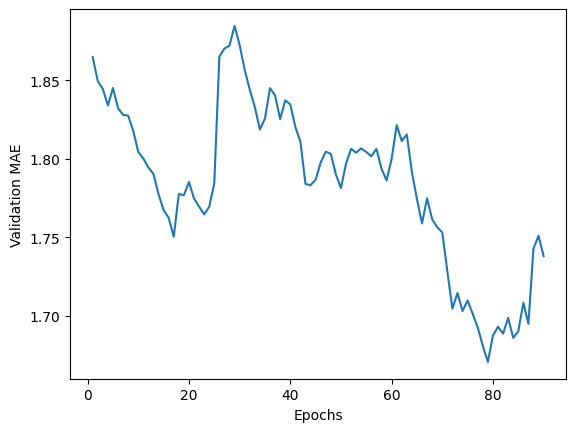

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

mae_history = history.history['val_mae']
smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Ponovo definisati model i istrenirati ga na 500 epoha. Ostale parametre ostaviti nepromijenjenim. Izvršiti
grafički prikaz usrednjenih vrijednosti kao u prethodnom zadatku. Uporediti ova dva grafička prikaza. Šta se
može zaključiti iz ovih grafika?

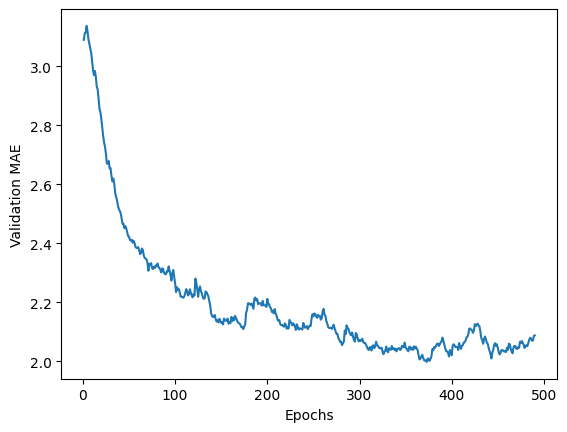

In [ ]:
model = model_mreze()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(train_data_scaled, train_targets, epochs=500, batch_size=1, validation_split=0.1, verbose=0)

mae_history = history.history['val_mae']
smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Izvršiti evaluaciju modela nad testnim skupom podataka. Koja je postignuta vrijednost funkcije gubitka, a
koja vrijednost metrike MAE? Koliko prosječno u dolarima griješi model u svojim predikcijama?

In [ ]:
test_loss, test_mae = model.evaluate(test_data_scaled, test_targets)
print("Postignuta vrijednost funkcije gubitka na testnom skupu:", test_loss)
print("Postignuta vrijednost MAE na testnom skupu:", test_mae)
print("Prosječna greška modela u dolarima:", test_mae * 1000)

4/4 [==============================] - 0s 3ms/step - loss: 10.2013 - mae: 2.2128
Postignuta vrijednost funkcije gubitka na testnom skupu: 10.201262474060059
Postignuta vrijednost MAE na testnom skupu: 2.212773084640503
Prosječna greška modela u dolarima: 2212.773084640503
